In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
case_oppertunity = pd.read_csv('/Users/michaelcolellajensen/Desktop/Tableau/case_oppertunities.csv')
print(case_oppertunity.shape)
print(case_oppertunity.columns)
print(case_oppertunity['ACCOUNTKEY'].nunique())
print(case_oppertunity['CASE_NUMBER'].nunique())

(183669, 35)
Index(['Unnamed: 0', 'STATUS', 'PRIORITY', 'IMPACT', 'ORIGIN', 'PRODUCT',
       'CATEGORY', 'SUBCATEGORY', 'CREATED_DATE', 'CLOSED_DATE',
       'CASE_CLOSED_REASON', 'RECORDTYPE', 'CASE_NUMBER', 'ACCOUNTKEY',
       'ACCOUNTTYPE', 'ACCOUNTTYPEDETAIL', 'EMPLOYEECOUNT', 'THEATER',
       'SUBREGION', 'SEGMENT', 'SUBSEGMENT', 'Tenure', 'Zero.Revenue.Flag',
       'Einstein Analytics', 'Role Based - Online', 'Server', 'Saas',
       'Role Based - On Prem', 'Services', 'Desktop', 'Role Based - NonProd',
       'Other', 'CLOSEDATE', 'ISWON', 'ISPARTNERRELATED'],
      dtype='object')
28348
183669


In [4]:
recent_opp_act = case_oppertunity.sort_values('CLOSEDATE', ascending=False).drop_duplicates('ACCOUNTKEY')
recent_opp_act['total_acv'] = recent_opp_act[['Einstein Analytics', 'Role Based - Online',
                                              'Server', 'Saas', 'Role Based - On Prem',
                                              'Services', 'Desktop', 'Role Based - NonProd']].sum()
print(recent_opp_act.shape)

(28348, 36)


In [5]:
recent_opp_binary = recent_opp_act
recent_opp_act['Einstein Analytics'] = np.where(recent_opp_act['Einstein Analytics'] > 0, 1, 0)
recent_opp_act['Server'] = np.where(recent_opp_act['Server'] > 0, 1, 0)
recent_opp_act['Saas'] = np.where(recent_opp_act['Saas'] > 0, 1, 0)
recent_opp_act['Role Based - On Prem'] = np.where(recent_opp_act['Role Based - On Prem'] > 0, 1, 0)
recent_opp_act['Role Based - Online'] = np.where(recent_opp_act['Role Based - Online'] > 0, 1, 0)
recent_opp_act['Services'] = np.where(recent_opp_act['Services'] > 0, 1, 0)
recent_opp_act['Desktop'] = np.where(recent_opp_act['Desktop'] > 0, 1, 0)
recent_opp_act['Role Based - NonProd'] = np.where(recent_opp_act['Role Based - NonProd'] > 0, 1, 0)
recent_opp_act['Other'] = np.where(recent_opp_act['Other'] > 0, 1, 0)
print(recent_opp_act.head())

        Unnamed: 0                  STATUS PRIORITY             IMPACT  \
179123      179123  Confirmation Requested       P2  Minority of Users   
173514      173514                Resolved       P2  Majority of Users   
180925      180925        Pending Customer       P4  Minority of Users   
177096      177096        Pending Customer       P4  Minority of Users   
178992      178992        Pending Customer       P3  Minority of Users   

        ORIGIN          PRODUCT                    CATEGORY  \
179123   Other  Tableau Desktop                        APIs   
173514     Pro   Tableau Server                   Licensing   
180925  Portal  Tableau Desktop  Connect and work with data   
177096  Portal   Tableau Server              Visualizations   
178992  Portal   Tableau Server                        APIs   

                       SUBCATEGORY     CREATED_DATE          CLOSED_DATE  ...  \
179123  Python Integration (TabPy)   3/9/2022 19:22  2022-03-27 18:39:00  ...   
173514        

In [6]:
def assign_cohort(x):
    if x['Tenure'] <= 1:
        return 4
    elif x['Tenure'] <= 5:
        return 3
    elif x['Tenure'] <= 9:
        return 3
    elif x['Tenure'] <= 15:
        return 2
    elif x['Tenure'] <= 25:
        return 1
    else:
        return 0
    
recent_opp_binary['cohort'] = recent_opp_binary.apply(assign_cohort,
                                                axis=1)
print(recent_opp_binary.shape)
cohort_size = [len(recent_opp_act[recent_opp_act['cohort'] == 0]),
               len(recent_opp_act[recent_opp_act['cohort'] == 1]),
               len(recent_opp_act[recent_opp_act['cohort'] == 2]),
               len(recent_opp_act[recent_opp_act['cohort'] == 3]),
               len(recent_opp_act[recent_opp_act['cohort'] == 4])]

(28348, 37)


In [8]:
summary = recent_opp_act.groupby('cohort').sum(['Einstein Analytics', 'Role Based - Online',
                                              'Server', 'Saas', 'Role Based - On Prem',
                                              'Services', 'Desktop', 'Role Based - NonProd'])
#summary.drop(['Unnamed: 0', 'STATUS', 'PRIORITY', 'IMPACT', 'ORIGIN', 'PRODUCT', 'CATEGORY',
              #'SUBCATEGORY', 'CREATED_DATE', 'CLOSED_DATE', 'CLOSEDATE', 'ISWON', 'CASE_NUMBER',
              #'ISPARTNERRELATED', 'total_acv', 'CASE_CLOSED_REASON', 'RECORDTYPE',
              #'ACCOUNTTYPE', 'ACCOUNTTYPEDETAIL', 'EMPLOYEECOUNT', 'THEATER', 'SEGMENT',
              #'SUBREGION', 'SUBSEGMENT', 'Tenure', 'Zero.Revenue.Flag'], inplace = True, axis = 1)
summary.drop(['Unnamed: 0', 'EMPLOYEECOUNT', 'Tenure', 'Zero.Revenue.Flag',
              'ISWON', 'ISPARTNERRELATED', 'total_acv'], inplace = True, axis = 1)
print(summary)

        Einstein Analytics  Role Based - Online  Server  Saas  \
cohort                                                          
0                       11                   66      10     3   
1                        0                   18       2     1   
2                        1                   19       3     0   
3                        1                   19       3     1   
4                      576                 2915     547    52   

        Role Based - On Prem  Services  Desktop  Role Based - NonProd  Other  
cohort                                                                        
0                         67         4        5                     0      1  
1                         20         0        0                     0      1  
2                         27         0        1                     0      0  
3                         27         1        2                     0      1  
4                       5565       246      436                     7 

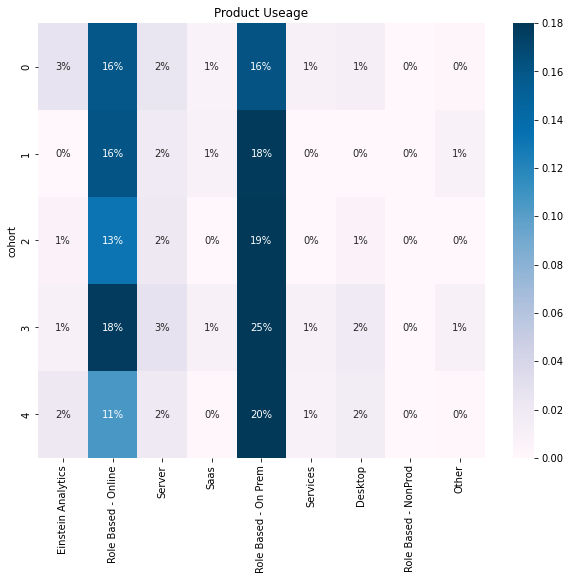

In [11]:
product_use = summary.divide(cohort_size, axis=0)
#product_use.drop('id', axis=1, inplace=True)
product_use.round(decimals=3)
plt.figure(figsize=(10,8))
plt.title('Product Useage')
sns.heatmap(data=product_use, 
            annot= True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.18,
            cmap='PuBu')
plt.show()

In [22]:
cases_grouped = case_oppertunity.groupby('ACCOUNTKEY')['CASE_NUMBER'].agg(['count'])
print(cases_grouped)
print(cases_grouped['count'].mean())

                                  count
ACCOUNTKEY                             
000018da887ac952b77d51c1e6826a4a     13
000682dbae7a366c6acece0989c5251b     11
000e29f3849ed00bf0d7a819016c24ee      3
0013a2c7fb8854e45b6656d236b62a5a     17
001f0faf4fdb97bbf95ca4f801c4372d      2
...                                 ...
fffbea9bb73eae66096240121bca0a55     47
fffc42e981785ef6df8b21d30e5389f5      1
fffcc63901bbf695985ef18b0a0f4b40      4
ffff15c523999dce650e7fa84b5eba62      2
ffff4cc2e89bbf08e5f5a0aa953a7613      2

[28348 rows x 1 columns]
6.479081416678425


In [43]:
account_case_count = recent_opp_binary.merge(cases_grouped,
                                             on='ACCOUNTKEY',
                                             how='inner')
print(account_case_count.shape)

(28348, 38)


In [44]:
def assign_case_cohort(x):
    if x['count'] <= 1:
        return 5
    elif x['count'] <= 4:
        return 4
    elif x['count'] <= 9:
        return 3
    elif x['count'] <= 30:
        return 2
    elif x['count'] <= 100:
        return 1
    else:
        return 0
    
account_case_count['case_cohort'] = account_case_count.apply(assign_case_cohort,
                                                             axis=1)
account_case_count = account_case_count[['case_cohort', 'Einstein Analytics', 
                                         'Role Based - Online','Server', 'Saas', 
                                         'Role Based - On Prem','Services', 'Desktop', 
                                         'Role Based - NonProd']]
cohort_case_size = [len(account_case_count[account_case_count['case_cohort'] == 0]),
               len(account_case_count[account_case_count['case_cohort'] == 1]),
               len(account_case_count[account_case_count['case_cohort'] == 2]),
               len(account_case_count[account_case_count['case_cohort'] == 3]),
               len(account_case_count[account_case_count['case_cohort'] == 4]),
               len(account_case_count[account_case_count['case_cohort'] == 5])]
print(cohort_size)

[144, 828, 3116, 4270, 9497, 10493]


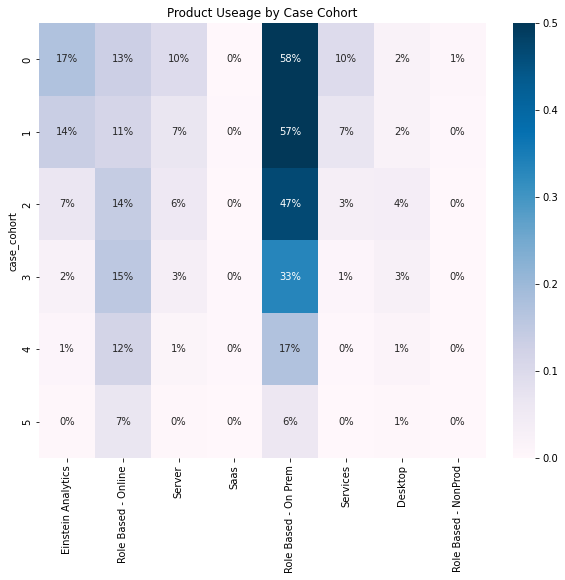

In [50]:
case_summary = account_case_count.groupby('case_cohort').sum(['Einstein Analytics', 'Role Based - Online',
                                                          'Server', 'Saas', 'Role Based - On Prem',
                                                          'Services', 'Desktop', 'Role Based - NonProd'])
case_summary.drop('count', inplace=True, axis=1)
product_use_by_case = case_summary.divide(cohort_case_size, axis=0)
#product_use.drop('id', axis=1, inplace=True)
product_use_by_case.round(decimals=3)
plt.figure(figsize=(10,8))
plt.title('Product Useage by Case Cohort')
sns.heatmap(data=product_use_by_case, 
            annot= True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.50,
            cmap='PuBu')
plt.show()